In [1]:
import time
from datetime import timedelta

from torch import load, no_grad
from torch.utils.data import DataLoader
from epnl import model, tasks, embedding, data

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import os.path as op

from pprint import pprint

In [2]:
def setup_test(task, classes, file, embedder):
    embedder = embedding.embedder_from_str(embedder)
    
    task = tasks.EdgeProbingTask(task, classes, embedder=embedder)

    infer_model = model.EdgeProbingModel(task, embedder)
    infer_model.load_state_dict(load(op.join("epnl/output/", file)))
    infer_model.eval()
    
    data_test = task.get_data(tasks.Task.TEST)
    loader_test = DataLoader(data_test, batch_size=32, shuffle=False, num_workers=4)

    start_time = time.time()

    rates = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}

    print(f"Testing task {task.get_name()}")

    with no_grad():
        for i_batch, batch in enumerate(loader_test):
            outputs = infer_model(batch)

            tp, tn, fp, fn = outputs["rates"]
            rates["tp"] += tp
            rates["tn"] += tn
            rates["fp"] += fp
            rates["fn"] += fn

    metrics = {
        "f1": model.get_metric(rates, "f1"),
        "acc": model.get_metric(rates, "acc"),
        "mcc": model.get_metric(rates, "mcc")
    }

    print(f"Test {task} with {embedder} [{timedelta(seconds=time.time() - start_time)}]")
    print(f"\t{' '.join([f'{m} {round(metrics[m], 4)}' for m in metrics])}")

In [3]:
generic_embedder = embedding.BERTEmbedder()

## DPR

In [4]:
task = "dpr"
classes = 1

eptask = tasks.EdgeProbingTask(task, classes, embedder=generic_embedder)
pprint(tasks.get_statistics(eptask))

setup_test(task=task,
           classes=classes,
           file="model-dpr-11Dec-19-08.pt", 
           embedder="BERT")

setup_test(task=task,
           classes=classes,
           file="model-dpr-11Dec-20-33.pt", 
           embedder="BERTL")

setup_test(task=task,
           classes=classes,
           file="model-dpr-12Dec-07-33.pt", 
           embedder="GPT2")

{'dev': {'n_ex': 171, 'n_tk': 3428, 'n_uq': 721},
 'test': {'n_ex': 711, 'n_tk': 10061, 'n_uq': 1373},
 'train': {'n_ex': 1437, 'n_tk': 19696, 'n_uq': 2178}}
Testing task dpr
Test EdgeProbingTask <N: 1 E: BERT> with BERT [0:00:01.447309]
	f1 0.3883 acc 0.4993 mcc 0.0002
Testing task dpr
Test EdgeProbingTask <N: 1 E: BERT-Large> with BERT-Large [0:00:02.780670]
	f1 0.4839 acc 0.5049 mcc 0.0102
Testing task dpr
Test EdgeProbingTask <N: 1 E: GPT2> with GPT2 [0:00:00.855518]
	f1 0.3689 acc 0.5091 mcc 0.0226


## Relation Classification

In [5]:
task = "rel"
classes = 19

eptask = tasks.EdgeProbingTask(task, classes, embedder=generic_embedder)
pprint(tasks.get_statistics(eptask))

setup_test(task=task,
           classes=classes,
           file="model-rel-11Dec-19-58.pt", 
           embedder="BERT")

setup_test(task=task,
           classes=classes,
           file="model-rel-11Dec-23-04.pt", 
           embedder="BERTL")

setup_test(task=task,
           classes=classes,
           file="model-rel-12Dec-08-28.pt", 
           embedder="GPT2")

{'dev': {'n_ex': 1200, 'n_tk': 22573, 'n_uq': 6774},
 'test': {'n_ex': 2717, 'n_tk': 51316, 'n_uq': 11775},
 'train': {'n_ex': 6800, 'n_tk': 128117, 'n_uq': 20404}}
Testing task rel
Test EdgeProbingTask <N: 19 E: BERT> with BERT [0:00:02.787928]
	f1 0.6735 acc 0.9712 mcc 0.6726
Testing task rel
Test EdgeProbingTask <N: 19 E: BERT-Large> with BERT-Large [0:00:04.367792]
	f1 0.6061 acc 0.966 mcc 0.6053
Testing task rel
Test EdgeProbingTask <N: 19 E: GPT2> with GPT2 [0:00:02.683550]
	f1 0.5292 acc 0.9631 mcc 0.5479


## TroFi

In [6]:
task = "trofi"
classes = 1

eptask = tasks.EdgeProbingTask(task, classes, embedder=generic_embedder)
pprint(tasks.get_statistics(eptask))

setup_test(task=task,
           classes=classes,
           file="model-trofi-11Dec-20-04.pt", 
           embedder="BERT")

setup_test(task=task,
           classes=classes,
           file="model-trofi-11Dec-23-25.pt", 
           embedder="BERTL")

setup_test(task=task,
           classes=classes,
           file="model-trofi-12Dec-08-35.pt", 
           embedder="GPT2")

{'dev': {'n_ex': 700, 'n_tk': 20112, 'n_uq': 5225},
 'test': {'n_ex': 934, 'n_tk': 27099, 'n_uq': 6346},
 'train': {'n_ex': 2100, 'n_tk': 59542, 'n_uq': 10290}}
Testing task trofi
Test EdgeProbingTask <N: 1 E: BERT> with BERT [0:00:00.722221]
	f1 0.7513 acc 0.7901 mcc 0.5702
Testing task trofi
Test EdgeProbingTask <N: 1 E: BERT-Large> with BERT-Large [0:00:00.749288]
	f1 0.6748 acc 0.743 mcc 0.4698
Testing task trofi
Test EdgeProbingTask <N: 1 E: GPT2> with GPT2 [0:00:00.606251]
	f1 0.6194 acc 0.7013 mcc 0.3817


## Metonymy

In [7]:
task = "metonymy"
classes = 1

eptask = tasks.EdgeProbingTask(task, classes, embedder=generic_embedder)
pprint(tasks.get_statistics(eptask))

setup_test(task=task,
           classes=classes,
           file="model-metonymy-11Dec-19-32.pt", 
           embedder="BERT")

setup_test(task=task,
           classes=classes,
           file="model-metonymy-11Dec-21-59.pt", 
           embedder="BERTL")

setup_test(task=task,
           classes=classes,
           file="model-metonymy-12Dec-08-07.pt", 
           embedder="GPT2")

{'dev': {'n_ex': 2252, 'n_tk': 61365, 'n_uq': 11749},
 'test': {'n_ex': 3754, 'n_tk': 103617, 'n_uq': 16103},
 'train': {'n_ex': 9007, 'n_tk': 245756, 'n_uq': 26466}}
Testing task metonymy
Test EdgeProbingTask <N: 1 E: BERT> with BERT [0:00:03.520045]
	f1 0.8845 acc 0.9092 mcc 0.8098
Testing task metonymy
Test EdgeProbingTask <N: 1 E: BERT-Large> with BERT-Large [0:00:06.792486]
	f1 0.855 acc 0.886 mcc 0.7612
Testing task metonymy
Test EdgeProbingTask <N: 1 E: GPT2> with GPT2 [0:00:03.587616]
	f1 0.8014 acc 0.8487 mcc 0.6797


## Progress

In [28]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [48]:
bert_progress = {"dpr": "epnl/output/history-dpr-11Dec-19-08.json",
           "metonymy": "epnl/output/history-metonymy-11Dec-19-38.json",
           "trofi": "epnl/output/history-trofi-11Dec-20-05.json",
           "rel": "epnl/output/history-rel-11Dec-19-58.json"}

bertl_progress = {"dpr": "epnl/output/history-dpr-11Dec-20-33.json",
           "metonymy": "epnl/output/history-metonymy-11Dec-22-08.json",
           "trofi": "epnl/output/history-trofi-11Dec-23-26.json",
           "rel": "epnl/output/history-rel-11Dec-23-04.json"}

gpt2_progress = {"dpr": "epnl/output/history-dpr-12Dec-07-34.json",
           "metonymy": "epnl/output/history-metonymy-12Dec-08-07.json",
           "trofi": "epnl/output/history-trofi-12Dec-08-35.json",
           "rel": "epnl/output/history-rel-12Dec-08-28.json"}

progress_reports = pd.DataFrame()

for s in bert_progress:
    report = pd.read_json(bert_progress[s])
    metrics = report["metrics"].apply(pd.Series)
    report = pd.concat([report, metrics], axis=1)
    report.drop(["metrics"], axis=1, inplace=True)

    report["data"] = s
    
    progress_reports = pd.concat([progress_reports, report], axis=0, sort=False)

### Loss

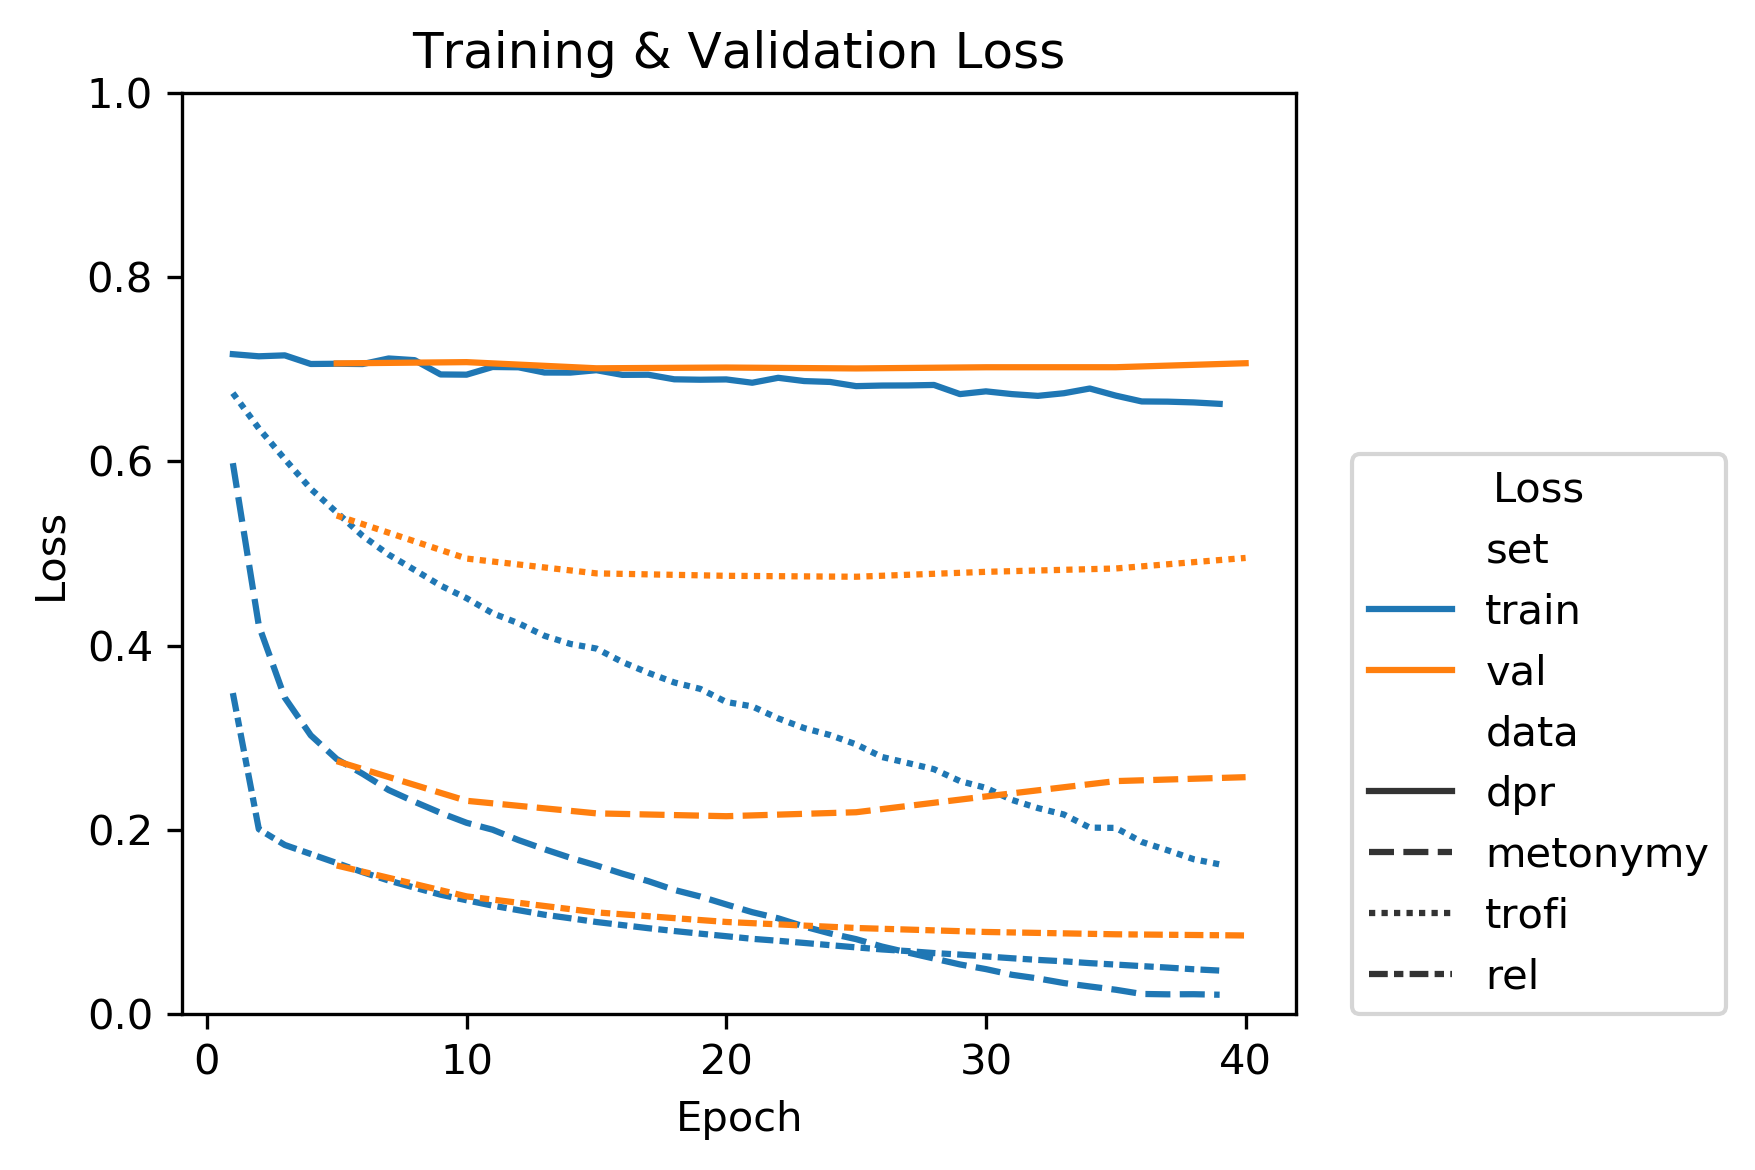

In [49]:
g = sns.lineplot(x="epoch", y="loss", hue="set", style="data", data = progress_reports, legend = "brief")

plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.title("Training & Validation Loss")
plt.legend(title="Loss", loc=(1.05, 0))
plt.ylim([0,1])
plt.tight_layout()

g.get_figure().savefig("epnl/output/figures/loss.png");

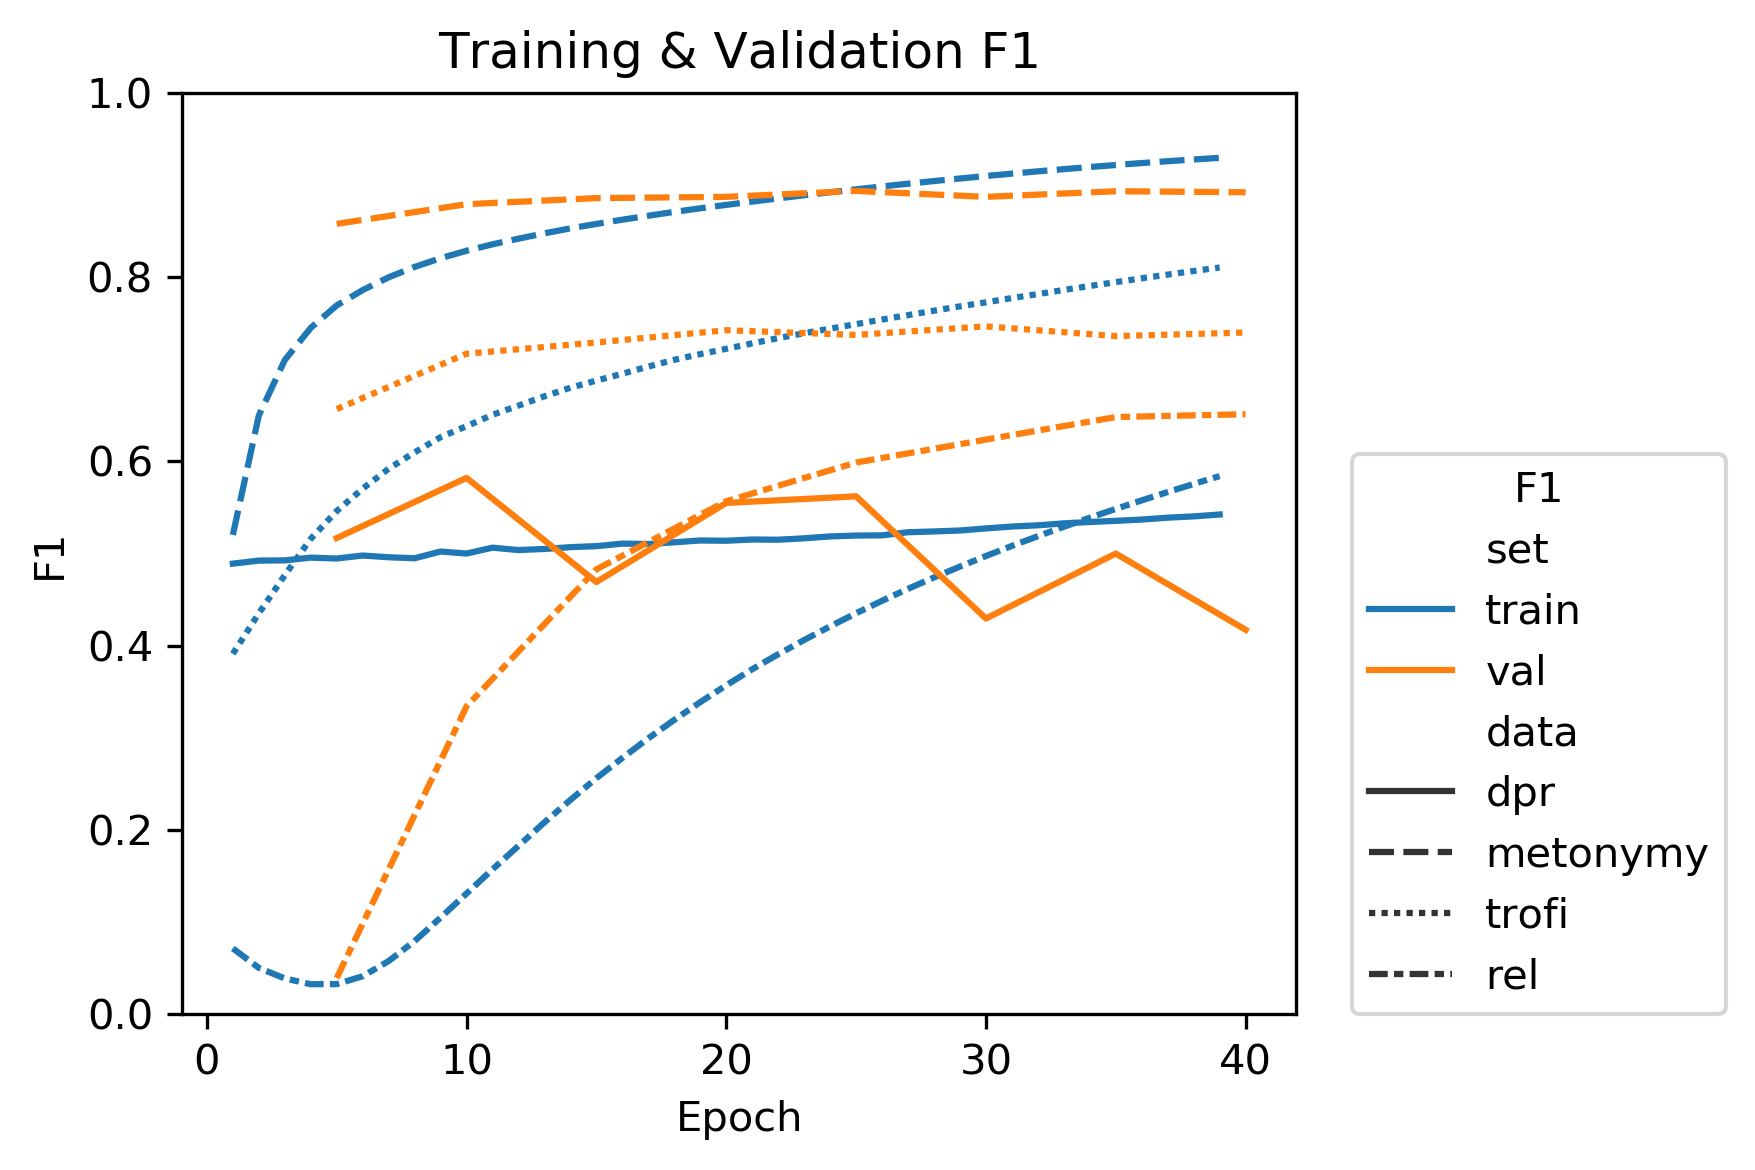

In [50]:
g = sns.lineplot(x="epoch", y="f1", hue="set", style="data", data = progress_reports, legend = "brief")
    
plt.ylabel("F1")
plt.xlabel("Epoch")
plt.title("Training & Validation F1")
plt.legend(title="F1", loc=(1.05, 0))
plt.ylim([0,1])
plt.tight_layout()

g.get_figure().savefig("epnl/output/figures/f1.png");

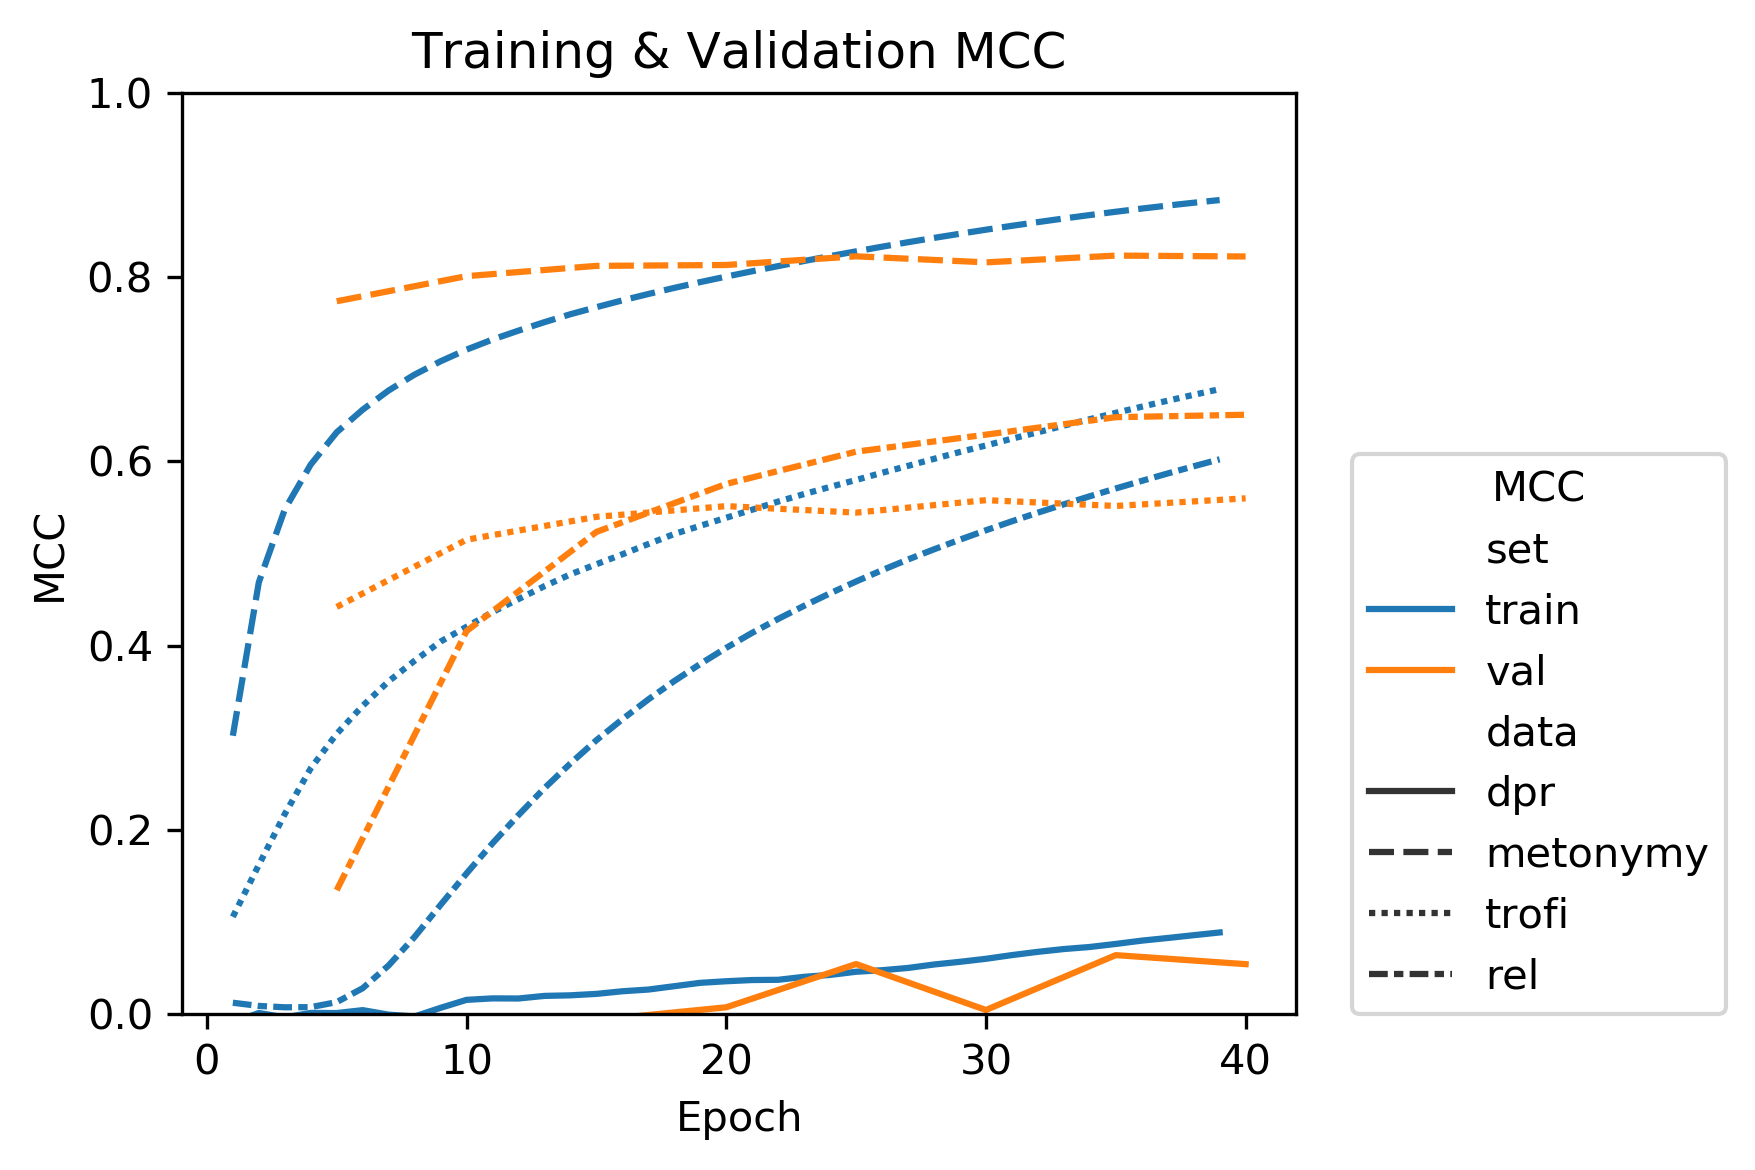

In [51]:
g = sns.lineplot(x="epoch", y="mcc", hue="set", style="data", data = progress_reports, legend = "brief")
    
plt.ylabel("MCC")
plt.xlabel("Epoch")
plt.title("Training & Validation MCC")
plt.legend(title="MCC", loc=(1.05, 0))
plt.ylim([0,1])
plt.tight_layout()

g.get_figure().savefig("epnl/output/figures/mcc.png");